In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Height-Weight Data.csv")

In [3]:
df.head(1)

,Height,Weight
0,73.847017,241.893563


In [8]:
df.Height.head(1)

0    73.847017
Name: Height, dtype: float64

In [10]:
df['Height'].head(2)

0    73.847017
1    68.781904
Name: Height, dtype: float64

In [11]:
df[5:8]

,Height,Weight
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111


In [12]:
df.mean()

Height     69.024411
Weight    186.891258
dtype: float64

In [13]:
df.Weight.mean()

186.89125797946284

In [15]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [16]:
df.shape

(3501, 2)

In [17]:
row, column=df.shape

In [18]:
row

3501

In [19]:
column

2

In [21]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

# Visualization

Text(0.5, 1.0, 'Height vs weight data plot')

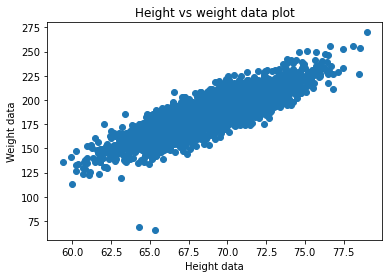

In [29]:
plt.scatter(df.Height, df.Weight)
#plt.plot(df.Height,df.Weight)
plt.xlabel('Height data')
plt.ylabel('Weight data')
plt.title('Height vs weight data plot')

In [30]:
x=df['Height']
y=df['Weight']

In [33]:
x=df[['Height']]  #x=independent
y=df['Weight']    #y=dependent

In [36]:
x.head(1)

,Height
0,73.847017


In [38]:
y.head(1)

0    241.893563
Name: Weight, dtype: float64

# Split dataset into train and test

In [39]:
from sklearn.model_selection import train_test_split as tts

In [45]:
xtrain,xtest,ytrain,ytest=tts(x,y,test_size=0.3)

In [46]:
xtrain.head(1)

,Height
3261,65.455855


In [47]:
ytrain.head(1)

3261    161.328228
Name: Weight, dtype: float64

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
reg=LinearRegression()

In [52]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [54]:
m=reg.coef_
m

array([5.9500478])

In [56]:
c=reg.intercept_
c

-223.74254873364745

In [58]:
df.head(2)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473


In [61]:
x1=68.781904
y=m*x1+c
y

array([185.51306786])

In [84]:
reg.predict([[68.781904]])

array([185.51306786])

In [63]:
pred=reg.predict(xtest)
pred

array([181.15835747, 193.52173337, 200.08250104, ..., 153.58071958,
       198.8930174 , 167.81412499])

In [65]:
pred2=reg.predict(xtrain)
pred2

array([165.72291625, 188.56926517, 199.9836351 , ..., 169.04645474,
       215.96561891, 194.47880659])

# Best Fit Line

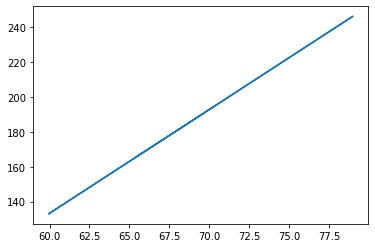

In [66]:
plt.plot(xtrain.squeeze(), reg.predict(xtrain))

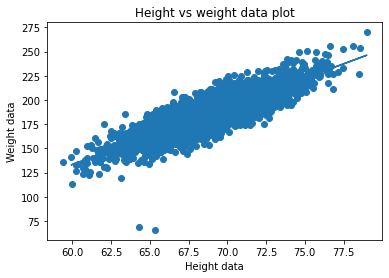

In [83]:
plt.scatter(df.Height, df.Weight)
#plt.plot(df.Height,df.Weight)
plt.xlabel('Height data')
plt.ylabel('Weight data')
plt.title('Height vs weight data plot')
plt.plot(xtrain.squeeze(), reg.predict(xtrain))

# Error Value Findings

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [72]:
mse=mean_squared_error(ytest,pred)
mse

119.99041772162174

In [82]:
mae=mean_absolute_error(ytest,pred)
mae

8.280433969755006

# Accuracy Finding

In [76]:
import warnings
warnings.filterwarnings('ignore')
reg.predict([[75]])

array([222.51103629])

In [77]:
reg.score(xtrain,ytrain)

0.7415853550902378

In [79]:
reg.score(xtest,ytest)

0.7119911147149377

In [81]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7119911147149377